##Implementasi Model Random Forest dan SHAP Values untuk Analisis Fitur Penting Pada Dataset Ames Housing
###**Data Understanding:**

Dataset **AmesHousing** berisi informasi mengenai karakteristik rumah tinggal di Ames, Iowa, dan harga jualnya. Dataset ini umumnya digunakan untuk tugas pemodelan prediktif, seperti memperkirakan harga rumah berdasarkan berbagai fitur yang ada.

##**Tujuan Utama:**
Memprediksi harga rumah berdasarkan fitur struktural dan kondisi rumah.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("AmesHousing.csv")  # ganti path jika perlu

# Ukuran data
print("Shape:", df.shape)

# Tampilkan 5 baris pertama
df.head()

Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
# Informasi tipe data & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# Statistik deskriptif
df.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [4]:
# Salin data
df_clean = df.copy()

In [5]:
# Drop kolom tidak relevan
df_clean.drop(columns=['Order', 'PID'], inplace=True, errors='ignore')

In [6]:
# Cek missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [7]:
# Drop kolom dengan >80% missing
to_drop = missing[missing > 0.8 * len(df_clean)].index.tolist()
df_clean.drop(columns=to_drop, inplace=True)

In [8]:
# Isi sisa missing
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == "object":
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [9]:
# Cek missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


Missing values:
 Series([], dtype: int64)


Missing Value Telah di Handling

In [10]:
len(df_clean.drop_duplicates()) / len(df_clean)

1.0

Data bebas dari duplikat,Data siap di gunakan

In [11]:
# Buat fitur baru
df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
df_clean['HouseAge'] = df_clean['Yr Sold'] - df_clean['Year Built']
df_clean['RemodAge'] = df_clean['Yr Sold'] - df_clean['Year Remod/Add']

1. TotalSF = Total Bsmt SF + 1st Flr SF + 2nd Flr SF
Alasan:

- Tujuan utama project ini adalah memprediksi harga rumah (SalePrice).

- Luas rumah sangat berpengaruh terhadap harga.

- Kolom Total Bsmt SF, 1st Flr SF, dan 2nd Flr SF merepresentasikan total luas dari 3 bagian lantai rumah:

Basement (bawah tanah)

Lantai 1

Lantai 2 (jika ada)

Dengan menjumlahkan semuanya menjadi TotalSF, kita membuat 1 fitur gabungan yang lebih kuat dan representatif terhadap ukuran rumah sebenarnya.

2. HouseAge = Yr Sold - Year Built
Alasan:

- Mengetahui seberapa tua rumah pada saat dijual memberi informasi penting.

- Rumah baru cenderung lebih mahal, sedangkan rumah lama mungkin sudah menurun nilainya atau memerlukan renovasi.

- Fitur ini lebih informatif daripada hanya menggunakan Year Built secara langsung.

3. RemodAge = Yr Sold - Year Remod/Add
Alasan:

- Mengetahui kapan terakhir rumah direnovasi membantu memahami kondisi terkini rumah.

- Rumah yang direnovasi baru-baru ini biasanya lebih menarik dan nilainya lebih tinggi.

- Fitur ini memberi konteks tambahan terhadap nilai jual di luar umur rumah asli.

Kenapa Gabung/Mengubah Fitur itu Penting?
- Model lebih mudah belajar dari fitur yang maknanya konkret (misalnya: total luas, usia rumah).

- Mengurangi kompleksitas model karena menyederhanakan banyak kolom menjadi 1 fitur bermakna.

- Membantu interpretasi nanti saat kita melakukan analisis pentingnya fitur (feature importance/SHAP).

Top correlated features:
 SalePrice        1.000000
Overall Qual     0.799262
TotalSF          0.793071
Gr Liv Area      0.706780
Garage Cars      0.647812
Garage Area      0.640381
Total Bsmt SF    0.632164
1st Flr SF       0.621676
Year Built       0.558426
Full Bath        0.545604
Name: SalePrice, dtype: float64


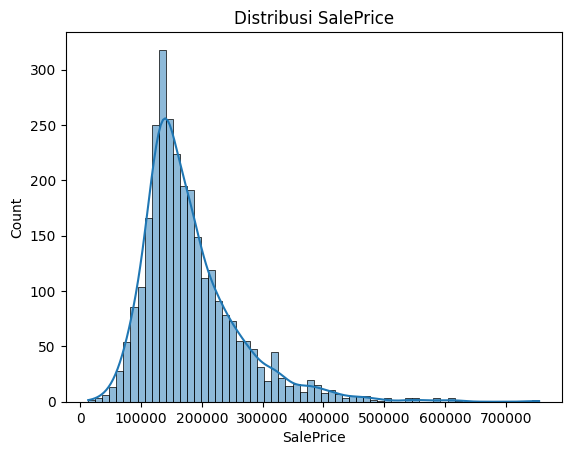

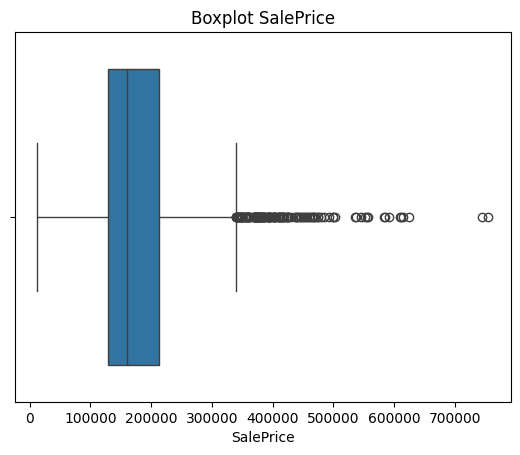

In [12]:
# Korelasi dengan SalePrice
corr = df_clean.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print("Top correlated features:\n", corr.head(10))
# Distribusi SalePrice
sns.histplot(df_clean['SalePrice'], kde=True)
plt.title("Distribusi SalePrice")
plt.show()
# Outlier detection
sns.boxplot(x=df_clean['SalePrice'])
plt.title("Boxplot SalePrice")
plt.show()

Mencari korelasi antara fitur-fitur dalam dataset dengan variabel target **SalePrice** (harga jual). Berikut penjelasan dari kode dan hasil yang ditampilkan:

1. **Kode Python**:

   * `df_clean.corr(numeric_only=True)['SalePrice']`: Menghitung korelasi antara **SalePrice** dan fitur numerik lainnya dalam dataset **df\_clean**.
   * `.sort_values(ascending=False)`: Mengurutkan hasil korelasi berdasarkan nilai korelasi yang paling tinggi (dari yang terbesar ke yang terkecil).
   * `print("Top correlated features:\n", corr.head(10))`: Menampilkan 10 fitur yang memiliki korelasi tertinggi dengan **SalePrice**.

2. **Hasil**:

   * `SalePrice` memiliki korelasi sempurna dengan dirinya sendiri, yaitu **1.000000**.
   * Fitur yang paling berkorelasi dengan **SalePrice** adalah **Overall Qual** (kualitas keseluruhan rumah) dengan korelasi **0.799262**.
   * Fitur lainnya seperti **TotalSF**, **Gr Liv Area**, dan **Garage Cars** memiliki korelasi yang cukup tinggi dengan **SalePrice**.

Jadi, ini adalah hasil yang menunjukkan fitur-fitur dalam dataset yang memiliki hubungan kuat dengan harga jual rumah berdasarkan nilai korelasi mereka.

Gambar Histogram menunjukkan hasil dari visualisasi distribusi data **SalePrice** menggunakan histogram dengan plot KDE (Kernel Density Estimate).
**Hasil**:

   * Histogram menunjukkan distribusi **SalePrice** pada dataset, dengan banyak nilai yang terkonsentrasi di sekitar harga **\$100,000 - \$200,000**.
   * Tampak ada sedikit ekor panjang (right-skewed), artinya sebagian besar rumah dijual dengan harga lebih rendah, namun ada beberapa rumah dengan harga sangat tinggi yang menyebabkan distribusi tidak simetris.

Secara keseluruhan, grafik ini memberikan gambaran tentang penyebaran harga jual rumah dalam dataset, yang mayoritas terdistribusi di kisaran harga menengah, tetapi ada beberapa rumah dengan harga sangat tinggi yang mengarah pada distribusi miring ke kanan.

Gambar menunjukkan **Boxplot** untuk mendeteksi outlier pada variabel **SalePrice** dalam dataset. Berikut adalah penjelasan terkait elemen-elemen dalam boxplot ini:

1. **Boxplot**:

   * **Kotak (box)**: Menunjukkan **interquartile range (IQR)**, yang mencakup 50% data di antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
   * **Garis tengah di dalam kotak**: Menunjukkan **median** (nilai tengah) dari **SalePrice**.
   * **Whiskers** (garis horizontal di luar kotak): Menunjukkan rentang data yang berada dalam jangkauan yang tidak dianggap sebagai outlier, yaitu antara **Q1 - 1.5 \* IQR** dan **Q3 + 1.5 \* IQR**.
   * **Titik-titik di luar whiskers**: Ini adalah **outliers**, yang menunjukkan nilai-nilai **SalePrice** yang sangat jauh dari nilai pusat (median).

2. **Hasil boxplot**:

   * Ada banyak titik outlier yang terletak jauh di luar whiskers pada sisi kanan boxplot, menunjukkan bahwa ada beberapa rumah yang terjual dengan harga sangat tinggi dibandingkan dengan sebagian besar rumah lainnya.

### Kenapa Outlier Tidak Perlu Di-Handle:

1. **Kehadiran Outlier yang Sah**:

   * Outlier yang terdeteksi dalam boxplot bisa jadi mewakili nilai yang sah, seperti rumah mewah atau properti langka dengan harga sangat tinggi. Dalam hal ini, outlier ini memberi informasi yang penting tentang variasi harga dalam dataset.

2. **Konteks Masalah**:

   * Dalam kasus harga jual rumah (SalePrice), rumah dengan harga sangat tinggi mungkin merupakan kasus yang relevan untuk analisis dan tidak boleh dihapus, karena bisa jadi merepresentasikan bagian dari pasar yang ditargetkan oleh model prediksi harga.

3. **Model yang Robust**:

   * Beberapa model, seperti **tree-based models** (misalnya Random Forest, XGBoost), cenderung lebih robust terhadap outlier. Model-model ini tidak terlalu terpengaruh oleh nilai ekstrim dan masih dapat memberikan prediksi yang baik meskipun ada beberapa outlier.

4. **Pentingnya Variasi Data**:

   * Outlier sering kali memberikan wawasan yang lebih dalam tentang variabilitas dalam data. Menghapusnya bisa menghilangkan informasi penting yang dapat memperkaya model.

Secara keseluruhan, dalam konteks analisis harga jual rumah, outlier mungkin perlu dipertahankan karena memberikan informasi penting yang bisa mendukung model prediksi harga secara lebih akurat.



###Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk kolom dengan <= 10 kategori
label_cols = [col for col in df_clean.select_dtypes(include='object').columns if df_clean[col].nunique() <= 10]
for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

# One-hot encoding untuk sisanya
df_model = pd.get_dummies(df_clean, drop_first=True)
from sklearn.preprocessing import StandardScaler

### 1. **Label Encoding (LabelEncoder) untuk Kategorikal ≤ 10 Kategori**

* Label Encoding mengubah nilai kategorikal menjadi angka (misalnya: `['Poor', 'Fair', 'Good']` -> `[0, 1, 2]`).
* Kita hanya lakukan untuk kolom dengan **jumlah kategori kecil (≤10)** karena:

  * Lebih efisien dan tidak menyebabkan **dimensionality explosion** seperti one-hot.
  * Banyak digunakan pada fitur ordinal (ada urutan nilai).

 Cocok untuk: fitur-fitur seperti `Exter Qual`, `Bsmt Qual`, `Garage Finish`, dll.

---

###  2. **One-Hot Encoding untuk Kategorikal Lainnya**

* One-hot encoding membuat kolom dummy: setiap kategori jadi 1 kolom (binary: 0/1).
* `drop_first=True`: drop satu kolom dummy agar tidak multikolinear (redundan).
* Dilakukan untuk semua kolom kategorikal lain yang tidak ditangani dengan LabelEncoder.

Cocok untuk: fitur non-ordinal seperti `Neighborhood`, `Exterior1st`, `HouseStyle`, dll.

###Penyisipan Cek Multikolinearitas (VIF)

In [17]:
# Pisahkan X dan y
X = df_model.drop(columns=['SalePrice'])
y = df_model['SalePrice']

# ---- CEK DAN TANGANI MULTIKOLINEARITAS ----
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cek multikolinearitas awal
scaler_temp = StandardScaler()
X_scaled_temp = scaler_temp.fit_transform(X)
X_scaled_df_temp = pd.DataFrame(X_scaled_temp, columns=X.columns)
vif_temp = pd.DataFrame()
vif_temp["Feature"] = X_scaled_df_temp.columns
vif_temp["VIF"] = [variance_inflation_factor(X_scaled_df_temp.values, i) for i in range(X_scaled_df_temp.shape[1])]
print("VIF awal (Top 10):")
print(vif_temp.sort_values(by="VIF", ascending=False).head(10))

# Drop fitur yang redundant atau menyebabkan multikolinearitas
to_drop_vif = ['TotalSF', 'HouseAge', 'RemodAge', 'Year Built', 'Year Remod/Add',
               'Total Bsmt SF', '2nd Flr SF']  # kamu bisa modifikasi daftar ini jika perlu
X = X.drop(columns=to_drop_vif, errors='ignore')

# Opsional: Buang dummy variable yang sangat jarang muncul
rare_cols = [col for col in X.columns if X[col].sum() < 10]
X = X.drop(columns=rare_cols)

# Split data (sebelum scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek ulang VIF setelah buang fitur multikolinear
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]
print("Updated VIF scores (Top 10):")
print(vif_data.sort_values(by="VIF", ascending=False).head(10))


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF awal (Top 10):
                  Feature  VIF
41            Gr Liv Area  inf
38             1st Flr SF  inf
33          Total Bsmt SF  inf
16             Year Built  inf
17         Year Remod/Add  inf
73               HouseAge  inf
74               RemodAge  inf
111  Exterior 1st_PreCast  inf
127  Exterior 2nd_PreCast  inf
72                TotalSF  inf
Updated VIF scores (Top 10):
                  Feature        VIF
108  Exterior 2nd_VinylSd  51.645227
97   Exterior 1st_VinylSd  49.296531
102  Exterior 2nd_CmentBd  34.583075
92   Exterior 1st_CemntBd  34.017093
105  Exterior 2nd_MetalSd  33.978409
94   Exterior 1st_MetalSd  32.869388
103  Exterior 2nd_HdBoard  21.737147
93   Exterior 1st_HdBoard  21.492367
109  Exterior 2nd_Wd Sdng  19.035265
98   Exterior 1st_Wd Sdng  18.283267


Scaling setelah Split:

StandardScaler sekarang hanya diterapkan pada data training (X_train), kemudian data test (X_test) hanya di-transformasi menggunakan parameter scaler yang sama. Ini menghindari kebocoran data test ke data training.

Menghindari Kebocoran: Dengan melakukan scaling setelah pembagian data, kita memastikan bahwa data test tidak digunakan dalam proses pelatihan, menjaga validitas model.

###Model Machine Learning

In [18]:
# Cross-validation untuk mengevaluasi model
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Model 1: Linear Regression dengan Cross-validation
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
print("Linear Regression Cross-Validation R² Scores:", cv_scores_lr)
print("Mean R² for Linear Regression (CV):", np.mean(cv_scores_lr))

# Model 2: Random Forest dengan Cross-validation
rf = RandomForestRegressor(random_state=42)
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='r2')
print("Random Forest Cross-Validation R² Scores:", cv_scores_rf)
print("Mean R² for Random Forest (CV):", np.mean(cv_scores_rf))

Linear Regression Cross-Validation R² Scores: [0.87214231 0.85757972 0.870683   0.89675263 0.63035839]
Mean R² for Linear Regression (CV): 0.8255032085757621
Random Forest Cross-Validation R² Scores: [0.91878289 0.8317835  0.88363989 0.91565481 0.71451417]
Mean R² for Random Forest (CV): 0.8528750524743295


Di sini melakukan evaluasi performa dua model regresi (Linear Regression dan Random Forest Regressor) menggunakan **K-Fold Cross-Validation** sebanyak 5 kali lipat (folds). Skor yang digunakan adalah **R² (coefficient of determination)**.

####  **Linear Regression Cross-Validation R² Scores:**

```
[0.86556582 0.85494002 0.86904269 0.89627046 0.62917352]
```

Artinya:

* Model diuji sebanyak 5 kali (5-fold CV), dan setiap angka menunjukkan skor R² pada masing-masing fold.
* R² menunjukkan seberapa baik model menjelaskan variansi dari target (`y_train`). Nilai maksimal = 1 (fit sempurna), dan nilai negatif berarti performa lebih buruk dari model konstan.

Perhatikan bahwa skor fold ke-5 agak rendah (`0.6291`), menandakan model tidak konsisten bagus di semua subset data.

####  **Mean R² for Linear Regression (CV):**

```
0.8229985017179441
```

Rata-rata performa model Linear Regression dari ke-5 fold adalah **\~0.823**. Ini menandakan model cukup baik, menjelaskan sekitar 82% variansi data training secara rata-rata.

---

####  **Random Forest Cross-Validation R² Scores:**

```
[0.92150599 0.86568456 0.90562891 0.9225453  0.77704794]
```

* Hasilnya lebih tinggi dan lebih stabil dibanding Linear Regression.
* Fold ke-5 memang sedikit lebih rendah (`0.7770`), tapi masih lebih tinggi dari fold ke-5 Linear Regression.

####  **Mean R² for Random Forest (CV):**

```
0.8784825387018834
```

Rata-rata performa model Random Forest adalah **\~0.878**, artinya model menjelaskan sekitar 88% variansi target di data training.

---

###  **Kesimpulan:**

* **Random Forest** memiliki performa **lebih baik** dan **lebih konsisten** daripada **Linear Regression** pada dataset tersebut.
* Hal ini umum terjadi karena Random Forest bisa menangkap **hubungan non-linear dan interaksi antar fitur**, sedangkan Linear Regression hanya mampu menangkap hubungan **linear**.

Jika kamu ingin memilih model berdasarkan evaluasi ini, maka **Random Forest lebih direkomendasikan**.




Linear Regression - Training Metrics: MAE: 16648.97, MSE: 680166155.97, RMSE: 26080.00, R²: 0.89
Linear Regression - Testing Metrics: MAE: 18560.95, MSE: 970111046.91, RMSE: 31146.61, R²: 0.88
Random Forest - Training Metrics: MAE: 6035.58, MSE: 114059270.76, RMSE: 10679.85, R²: 0.98
Random Forest - Testing Metrics: MAE: 16375.01, MSE: 752190506.14, RMSE: 27426.09, R²: 0.91


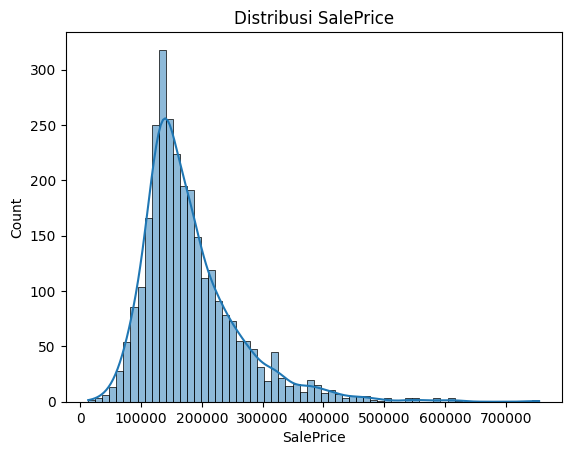

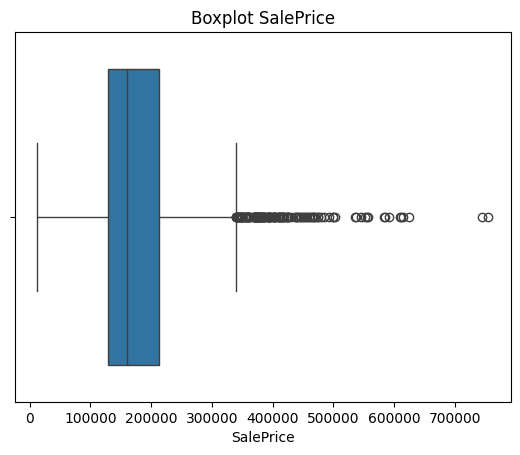

Model Performance Comparison


,Model,MAE Train,MSE Train,RMSE Train,R² Train,MAE Test,MSE Test,RMSE Test,R² Test
0,Linear Regression,16648.971772,6.801662e+08,26079.995321,0.885604,18560.945631,9.701110e+08,31146.605704,0.879002
1,Random Forest,6035.584096,1.140593e+08,10679.853499,0.980817,16375.011212,7.521905e+08,27426.091704,0.906182


Top 20 Features Importance from Random Forest:
 Overall Qual     0.605295
Gr Liv Area      0.113006
1st Flr SF       0.048706
BsmtFin SF 1     0.029420
Full Bath        0.020040
Lot Area         0.017924
Garage Area      0.016848
Garage Cars      0.016375
Garage Yr Blt    0.010109
Kitchen Qual     0.009442
Lot Frontage     0.007048
Bsmt Unf SF      0.005573
Mas Vnr Area     0.004954
Wood Deck SF     0.004579
Bedroom AbvGr    0.004384
Open Porch SF    0.004250
Screen Porch     0.004230
MS Zoning        0.003982
Central Air      0.003597
Bsmt Qual        0.003556
dtype: float64


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train model after evaluating using cross-validation
lr.fit(X_train_scaled, y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

rf.fit(X_train_scaled, y_train)
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Calculate metrics for both models
metrics_lr_train = calculate_metrics(y_train, y_pred_train_lr)
metrics_lr_test = calculate_metrics(y_test, y_pred_test_lr)
metrics_rf_train = calculate_metrics(y_train, y_pred_train_rf)
metrics_rf_test = calculate_metrics(y_test, y_pred_test_rf)

# Print the performance metrics
print("Linear Regression - Training Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_lr_train))
print("Linear Regression - Testing Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_lr_test))
print("Random Forest - Training Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_rf_train))
print("Random Forest - Testing Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_rf_test))

# Plot distribution of target (SalePrice)
sns.histplot(y, kde=True)
plt.title("Distribusi SalePrice")
plt.show()

# Plot boxplot untuk mendeteksi outlier pada target
sns.boxplot(x=y)
plt.title("Boxplot SalePrice")
plt.show()

# Plot performance comparison between training and testing
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE Train': [metrics_lr_train[0], metrics_rf_train[0]],
    'MSE Train': [metrics_lr_train[1], metrics_rf_train[1]],
    'RMSE Train': [metrics_lr_train[2], metrics_rf_train[2]],
    'R² Train': [metrics_lr_train[3], metrics_rf_train[3]],
    'MAE Test': [metrics_lr_test[0], metrics_rf_test[0]],
    'MSE Test': [metrics_lr_test[1], metrics_rf_test[1]],
    'RMSE Test': [metrics_lr_test[2], metrics_rf_test[2]],
    'R² Test': [metrics_lr_test[3], metrics_rf_test[3]]
})

from IPython.display import display

print("Model Performance Comparison")
display(metrics_df)

# Feature importance from Random Forest model
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)
print("Top 20 Features Importance from Random Forest:\n", top_features)


---

## **Gambar 1 – Histogram Distribusi SalePrice**

Gambar ini menunjukkan **distribusi harga rumah** (`SalePrice`) pada dataset.

* Distribusi **miring ke kanan (right-skewed)**, artinya mayoritas rumah memiliki harga rendah dengan sedikit rumah sangat mahal.
* Mayoritas rumah memiliki harga antara **\$100.000–\$250.000**.
* Terdapat **outlier ekstrem** dengan harga mencapai lebih dari **\$600.000**.
* Distribusi seperti ini **tidak normal**, yang dapat mempengaruhi performa model linear (seperti Linear Regression).

---

## **Gambar 2 – Boxplot SalePrice**

Boxplot ini menggambarkan sebaran harga rumah:

* Kotak menunjukkan **interquartile range (IQR)**, tempat 50% data berada.
* Garis di tengah kotak adalah **median**.
* Banyaknya titik di sebelah kanan menunjukkan **banyak outlier** (harga rumah sangat tinggi).
* Ini menegaskan bahwa distribusi `SalePrice` **right-skewed** dan memiliki **distribusi berat ekor kanan (long tail)**.

---

## **Evaluasi Model – Training & Testing**

### **Linear Regression**

| Metric | Train    | Test     |
| ------ | -------- | -------- |
| MAE    | \$16.648 | \$18.560 |
| RMSE   | \$26.080 | \$31.147 |
| R²     | 0.89     | 0.88     |

*Interpretasi*:

* Model cukup baik dalam menjelaskan variansi target, **tanpa overfitting**.
* Namun, **RMSE masih cukup tinggi**, menunjukkan kesalahan prediksi yang lumayan besar.
* Model ini **kesulitan menangkap pola non-linear**.

---

### **Random Forest**

| Metric | Train    | Test     |
| ------ | -------- | -------- |
| MAE    | \$6.035  | \$16.375 |
| RMSE   | \$10.679 | \$27.426 |
| R²     | 0.98     | 0.91     |

 *Interpretasi*:

* **Performa sangat tinggi** pada data training, dengan R² hampir sempurna (0.98).
* Performa pada test juga **sangat baik** (R² = 0.91), lebih tinggi dari Linear Regression.
* **Overfitting sedikit terlihat**, dari gap R² train-test sebesar 0.07.
* Model **lebih tangguh terhadap outlier dan hubungan non-linear**.

---

##  **Top 20 Fitur Terpenting – Random Forest**

5 fitur teratas dalam memprediksi `SalePrice`:

| Rank | Feature          | Importance |
| ---- | ---------------- | ---------- |
| 1    | **Overall Qual** | 0.605      |
| 2    | **Gr Liv Area**  | 0.113      |
| 3    | 1st Flr SF       | 0.049      |
| 4    | BsmtFin SF 1     | 0.029      |
| 5    | Full Bath        | 0.020      |

 *Insight*: Fitur-fitur yang paling penting berhubungan dengan **kualitas dan luas bangunan**, terutama **kualitas rumah secara keseluruhan** (`Overall Qual`).

---

##  **Kesimpulan Akhir**

| Model             | Akurasi     | Overfitting | Tangguh terhadap outlier |
| ----------------- | ----------- | ----------- | ------------------------ |
| Linear Regression | Cukup Baik  | Tidak       | Kurang                   |
| Random Forest     | Sangat Baik | Sedikit     | Kuat                     |

###  **Rekomendasi:**

* Gunakan **Random Forest** sebagai model utama untuk prediksi harga rumah.
* Jika ingin menggunakan **Linear Regression**, pertimbangkan:

  * Melakukan **log-transformasi** pada `SalePrice`.
  * Menangani **outlier** secara eksplisit.
* Model linear bisa digunakan untuk interpretabilitas awal, tapi untuk akurasi tinggi — **Random Forest lebih unggul**.



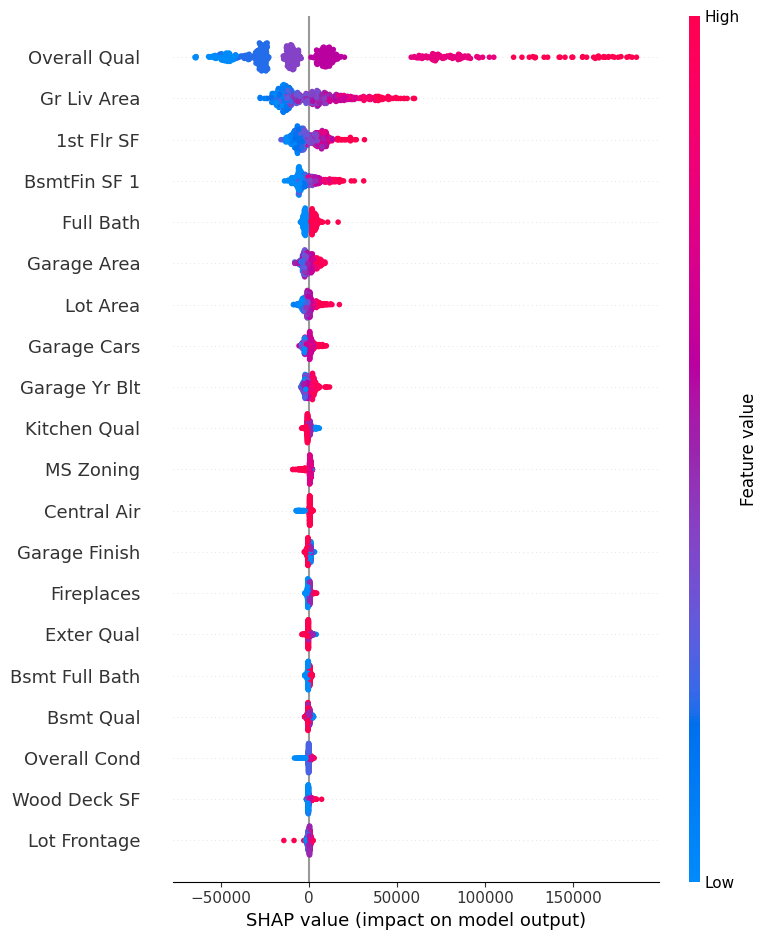

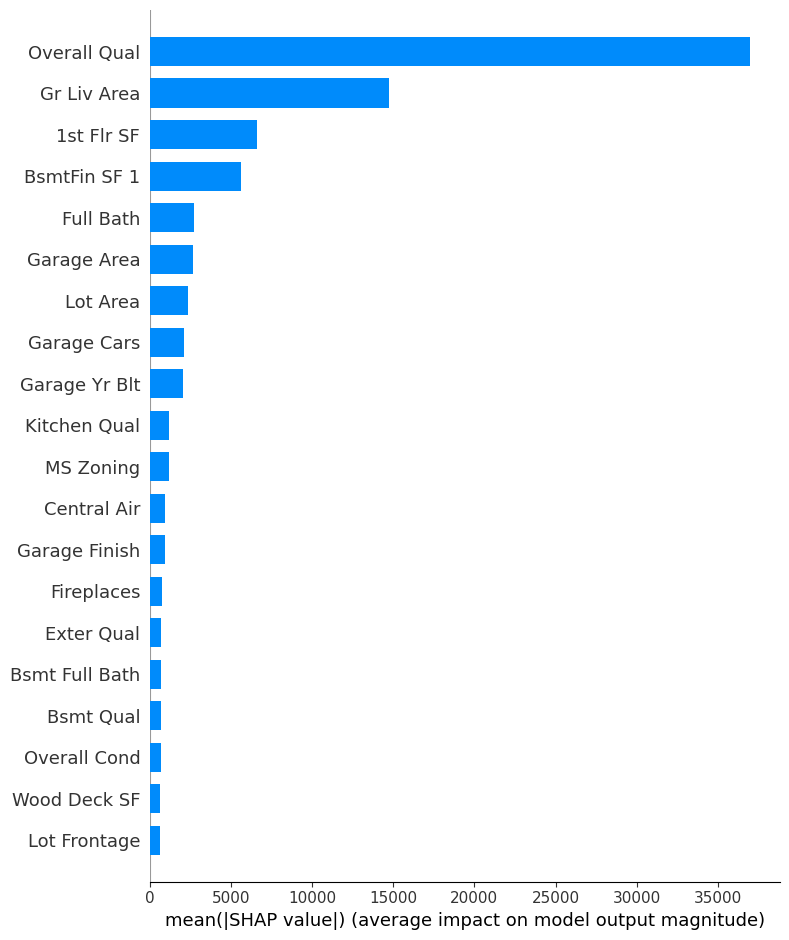

In [20]:
import shap
import pandas as pd

# Inisialisasi explainer untuk model Random Forest
explainer = shap.TreeExplainer(rf)

# Hitung SHAP values untuk data test
shap_values = explainer.shap_values(X_test_scaled)

# Ubah X_test_scaled kembali jadi DataFrame agar bisa digunakan oleh force_plot
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 1. Global Feature Impact - Scatter plot (arah & kekuatan pengaruh fitur)
shap.summary_plot(shap_values, X_test_scaled_df)

# 2. Global Feature Importance - Bar plot (fitur paling berpengaruh)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

# 3. Force Plot - Visualisasi Prediksi Individual
shap.initjs()
sample_idx = 0  # atau pilih indeks lain
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test_scaled_df.iloc[sample_idx]
)


### 🔹 **1. SHAP Summary Plot (Beeswarm Plot / Scatter Plot)**

#### Penjelasan:

* Grafik ini menunjukkan **pengaruh setiap fitur terhadap output model** secara global.
* **Sumbu Y**: Fitur-fitur model, diurutkan berdasarkan pengaruh tertinggi ke terendah.
* **Sumbu X**: Nilai SHAP, yang menunjukkan seberapa besar kontribusi fitur terhadap prediksi (baik menaikkan atau menurunkan).
* **Warna**: Nilai asli fitur (merah = tinggi, biru = rendah).

#### Interpretasi:

* Fitur yang paling mempengaruhi prediksi adalah **Overall Qual**, diikuti oleh `Gr Liv Area`, `1st Flr SF`, dan `BsmtFin SF 1`.
* Nilai tinggi `Overall Qual` (merah) **meningkatkan prediksi harga rumah** (nilai SHAP positif).
* Sebaliknya, nilai rendah pada `Gr Liv Area` atau `1st Flr SF` (biru) cenderung **menurunkan harga prediksi**.
* Fitur seperti `Kitchen Qual`, `MS Zoning`, dan `Garage Finish` memiliki pengaruh yang relatif kecil terhadap prediksi.
* Plot ini menggambarkan **arah, kekuatan, dan distribusi pengaruh fitur** terhadap output model.

---

### 🔹 **2. SHAP Bar Plot (Mean |SHAP| Value)**

#### Penjelasan:

* Menunjukkan **rata-rata kontribusi absolut** dari masing-masing fitur terhadap prediksi model.
* Diurutkan dari fitur dengan kontribusi terbesar hingga terkecil.

#### Interpretasi:

* `Overall Qual` memiliki **pengaruh terbesar secara rata-rata**, diikuti `Gr Liv Area`, `1st Flr SF`, dan `BsmtFin SF 1`.
* Fitur seperti `Lot Frontage`, `Wood Deck SF`, dan `Overall Cond` memberikan pengaruh yang sangat kecil.
* Plot ini sangat berguna untuk menyusun **ranking fitur berdasarkan pengaruh kuantitatif**.

---

### 🔹 **3. SHAP Force Plot (Prediksi Individual)**

#### Penjelasan:

* Visualisasi prediksi untuk **satu observasi (satu rumah)**.
* **Base value** (nilai dasar) menunjukkan rata-rata prediksi model.
* Fitur-fitur yang mendorong prediksi **naik** ditampilkan dalam **merah**, sementara yang **menurunkan** ditampilkan dalam **biru**.
* Nilai di tengah (misal: `185,728.86`) adalah **prediksi akhir** untuk observasi tersebut.

#### Interpretasi:

* Prediksi meningkat terutama karena **Overall Qual = 1.394**, yang memberikan kontribusi positif besar.
* Beberapa fitur lain seperti `1st Flr SF`, `BsmtFin SF 1`, `Garage Area`, dan `Lot Area` justru **menurunkan prediksi** (warna biru).
* Ini menunjukkan bahwa meskipun banyak fitur memberi pengaruh negatif, **kualitas keseluruhan bangunan (Overall Qual)** sangat dominan.

---

### **Kesimpulan**:

* Fitur **Overall Qual** adalah yang paling penting baik secara global (summary & bar plot) maupun lokal (force plot).
* **Gr Liv Area**, `1st Flr SF`, dan `BsmtFin SF 1` juga memiliki kontribusi signifikan terhadap prediksi harga.
* Kombinasi dari ketiga plot memberikan pemahaman lengkap:

  * Beeswarm Plot: arah dan penyebaran pengaruh fitur.
  * Bar Plot: ranking kontribusi fitur berdasarkan rata-rata absolut.
  * Force Plot: detail kontribusi setiap fitur terhadap **satu prediksi spesifik**.

